### Import dataset 

In [1]:
from functions import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= loaddataset('dataset.csv', 'Z8RsBpxhnkebK5fvahVCmfV7icO2')

In [3]:
data.head()

,uid,time,valueHR,valuesteps,WkHR,WkCal,WkSteps,sec,sugarValue,cal,carbs,fat,fiber,protein,sodium
823,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:00:00,77.0,0.0,0.0,0.0,0.0,0.0,90.82098,0.0,0.0,0.0,0.0,0.0,0.0
824,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:15:00,75.0,49.0,0.0,0.0,0.0,0.0,90.61686,0.0,0.0,0.0,0.0,0.0,0.0
825,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:30:00,73.0,71.0,0.0,0.0,0.0,0.0,86.22828,0.0,0.0,0.0,0.0,0.0,0.0
826,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 12:45:00,89.0,650.0,0.0,0.0,0.0,0.0,82.04382,0.0,0.0,0.0,0.0,0.0,0.0
827,Z8RsBpxhnkebK5fvahVCmfV7icO2,2020-01-09 13:00:00,97.0,393.0,0.0,0.0,0.0,0.0,79.90056,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:

data1=preprocess(data, 0)
data2=preprocess(data,1)

In [5]:
data1.head()

,sugarValue
time,
2020-01-09 12:00:00,90.82098
2020-01-09 12:15:00,90.61686
2020-01-09 12:30:00,86.22828
2020-01-09 12:45:00,82.04382
2020-01-09 13:00:00,79.90056


### Plot the original data

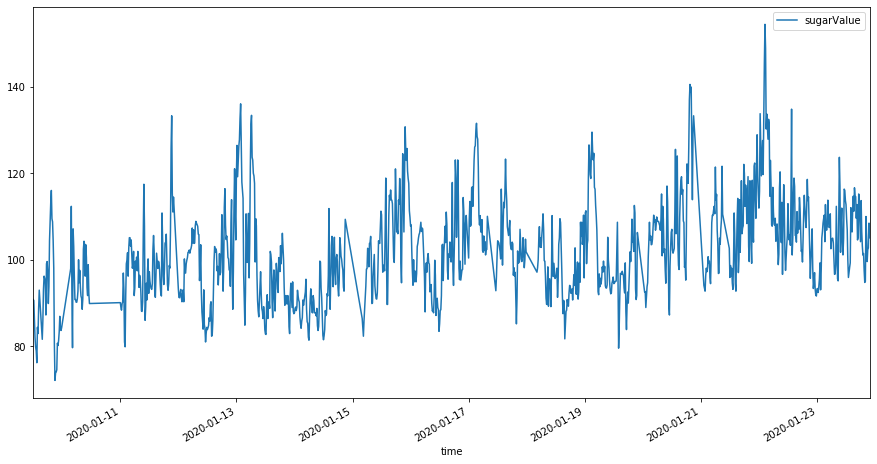

In [6]:
#visualize the data
ax = data1.plot(figsize=(15,8))



### Look the seasonal decompose

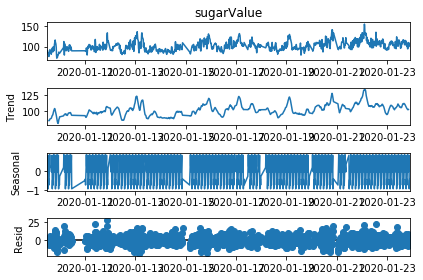

In [7]:
seasonal_decompose(data1['sugarValue'], freq=12).plot();

### Auto Arima evaluation for chose a model 

In [8]:
#find arima model
results = auto_arima(data1['sugarValue'], seasonal=True, m=12, trace = True)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=7767.161, BIC=7807.922, Time=3.377 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=7936.036, BIC=7946.226, Time=0.020 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=7937.733, BIC=7958.114, Time=0.408 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=7936.597, BIC=7956.977, Time=0.448 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=7934.040, BIC=7939.135, Time=0.014 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 12) (constant=True); AIC=7766.425, BIC=7802.090, Time=1.181 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 12) (constant=True); AIC=7770.206, BIC=7800.776, Time=0.378 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 2, 12) (constant=True); AIC=7767.161, BIC=7807.922, Time=4.496 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 12) (constant=True); AIC=7766.050, BIC=7801.715, Time=1.444 seconds
Fit ARIMA: (2, 1, 2)x(2, 0, 0, 12) (constant=True); AIC=7767.160,

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1207
Model:             SARIMAX(0, 1, 3)x(1, 0, [], 12)   Log Likelihood               -3875.813
Date:                             Sun, 29 Mar 2020   AIC                           7763.626
Time:                                     14:58:01   BIC                           7794.196
Sample:                                          0   HQIC                          7775.138
                                            - 1207                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.081      0.190      0.849      -0.144       0.175
ma.L1         -0.0689      0.024     -2.872      0.004      -0.116      -0.022
ma.L2         -0.3880      0.022    -17.293      0.000      -0.432      -0.344
ma.L3         -0.0808      0.027     -3.011      0.003      -0.133      -0.028
ar.S.L12      -0.0763      0.029     -2.662      0.008      -0.132      -0.020
sigma2        36.2086      1.101     32.883      0.000      34.050      38.367
===================================================================================
Ljung-Box (Q):                       53.18   Jarque-Bera (JB):               211.63
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 ## Time series analysis and cross-validation with slide-window.

Backtest Machine Learning Models

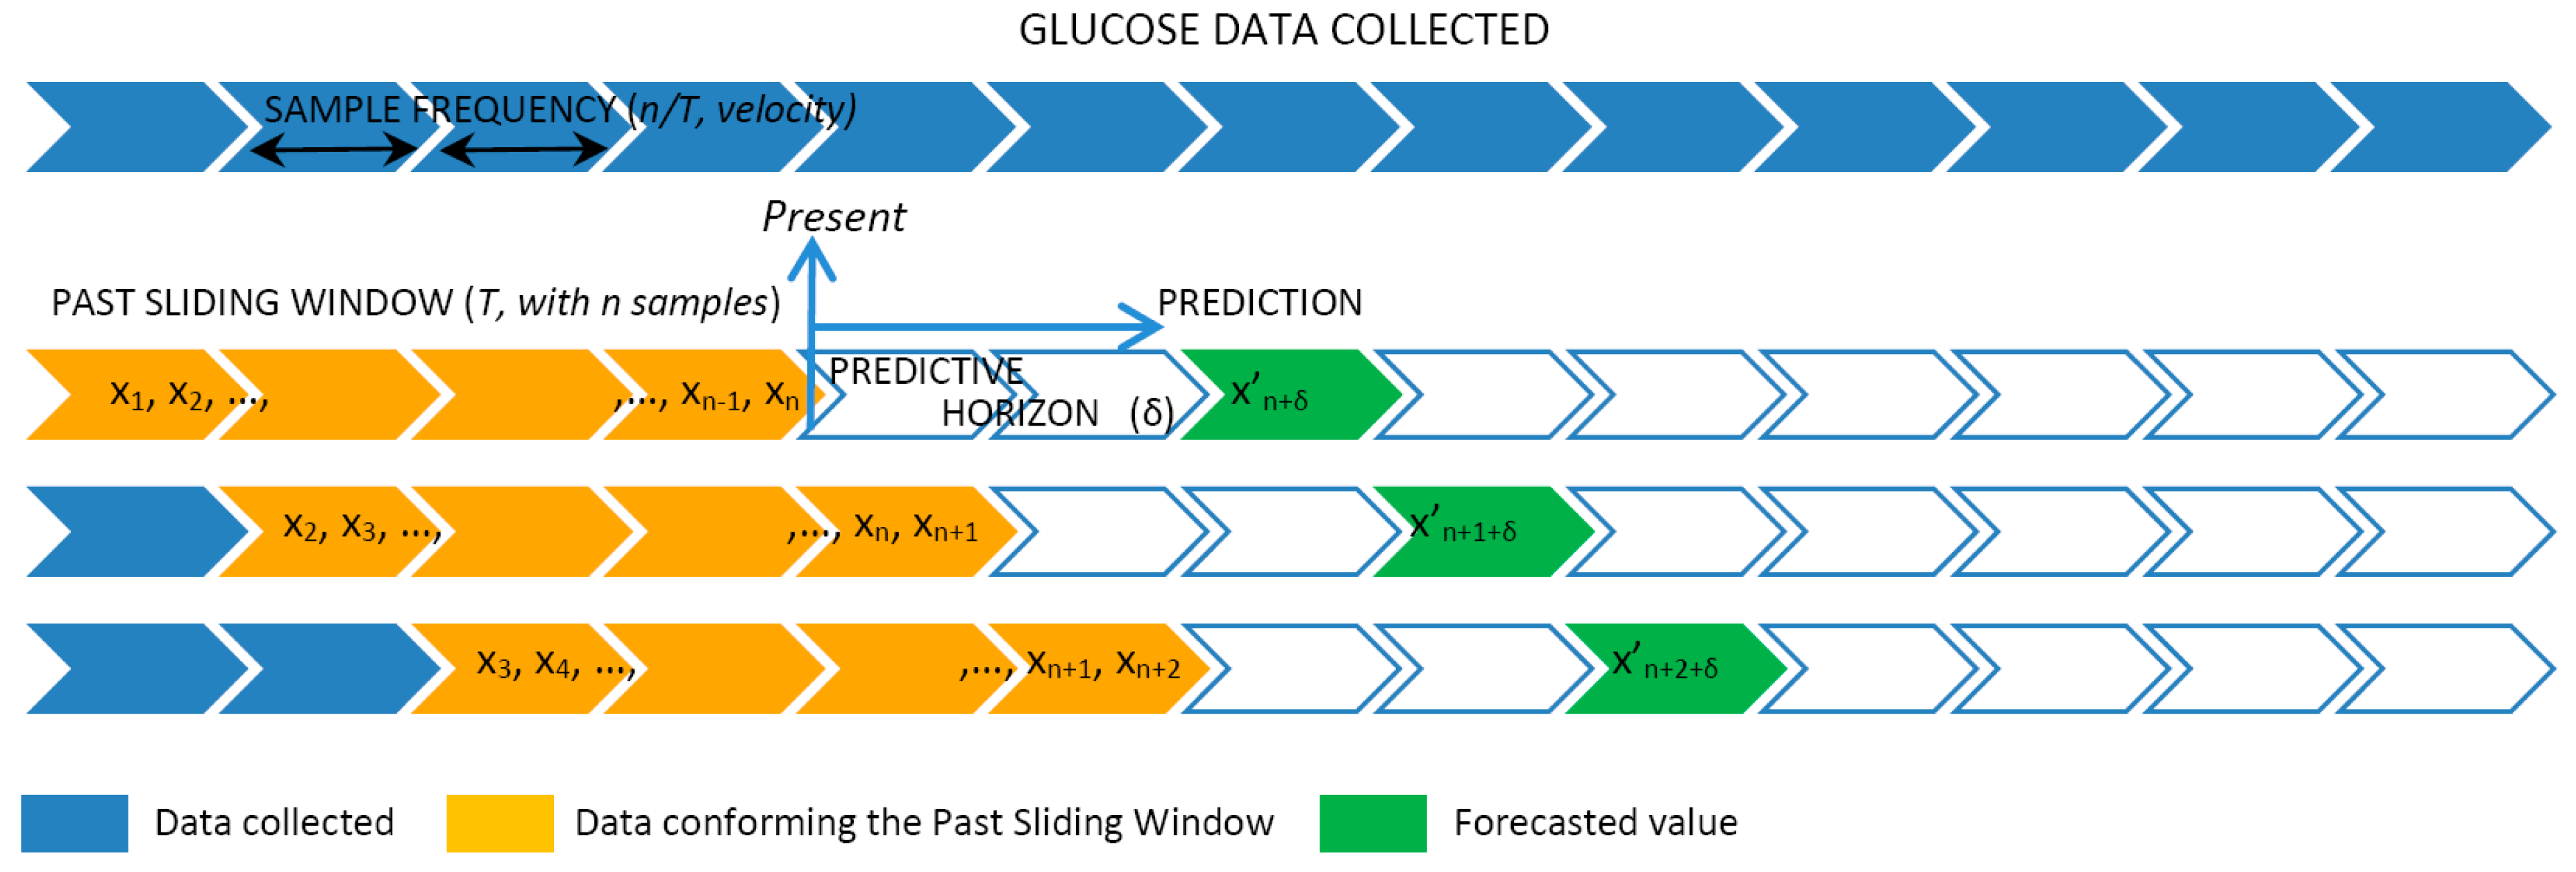


![image.png](image.png)

## Create a windows, compute the predictions and calculate the MAE and RMSE for each window. Save the values in a dataset. 





In [7]:
Arima = prediction(data1,1,1,0,0)

--- 22744.45418357849 Seconds for computation ---


### The dataset will show :

#### - Current train (the current window values) 
#### - Current test (the predicted values)
#### - MSE the average of the forecast error values
#### - RMSE (root mean square error)
#### - Predictive horizons (PHs) for each window.

In [8]:
Arima

,Current train,Current test,MSE,RMSE,Interval,cat
0,From: 2020-01-09 12:00:00 to: 2020-01-09 15:45:00,From: 2020-01-09 16:00:00 to: 2020-01-09 16:00:00,36.977797,6.080937,15Min 3PSW,15
1,From: 2020-01-09 12:15:00 to: 2020-01-09 16:00:00,From: 2020-01-09 16:15:00 to: 2020-01-09 16:15:00,20.344493,4.510487,15Min 3PSW,15
2,From: 2020-01-09 12:30:00 to: 2020-01-09 16:15:00,From: 2020-01-09 16:30:00 to: 2020-01-09 16:30:00,25.294927,5.029406,15Min 3PSW,15
3,From: 2020-01-09 12:45:00 to: 2020-01-09 16:30:00,From: 2020-01-09 16:45:00 to: 2020-01-09 16:45:00,3.827524,1.956406,15Min 3PSW,15
4,From: 2020-01-09 13:00:00 to: 2020-01-09 16:45:00,From: 2020-01-09 17:00:00 to: 2020-01-09 17:00:00,1.544768,1.242887,15Min 3PSW,15
...,...,...,...,...,...,...
102811,From: 2020-01-20 11:30:00 to: 2020-01-23 18:00:00,From: 2020-01-23 18:15:00 to: 2020-01-23 21:00:00,34.582613,5.880698,180Min 72PSW,180
102812,From: 2020-01-20 11:45:00 to: 2020-01-23 18:15:00,From: 2020-01-23 18:30:00 to: 2020-01-23 21:15:00,28.967066,5.382106,180Min 72PSW,180
102813,From: 2020-01-20 12:00:00 to: 2020-01-23 18:30:00,From: 2020-01-23 18:45:00 to: 2020-01-23 21:30:00,26.189333,5.117551,180Min 72PSW,180
102814,From: 2020-01-20 12:15:00 to: 2020-01-23 18:45:00,From: 2020-01-23 19:00:00 to: 2020-01-23 21:45:00,26.669569,5.164259,180Min 72PSW,180


In [9]:
X = data2.drop('sugarValue', axis=1)
y = data2['sugarValue']

In [10]:
RF = prediction(data2,2,1, X, y)

--- 24620.724667787552 Seconds for computation ---


In [11]:
SVM = prediction(data2,3,1, X, y)

--- 2428.9611146450043 Seconds for computation ---


## Plot the all RMSE (ARIMA; RF; SVM) in a boxplot, from 3h window to 72h window with PH from 15min to 180min



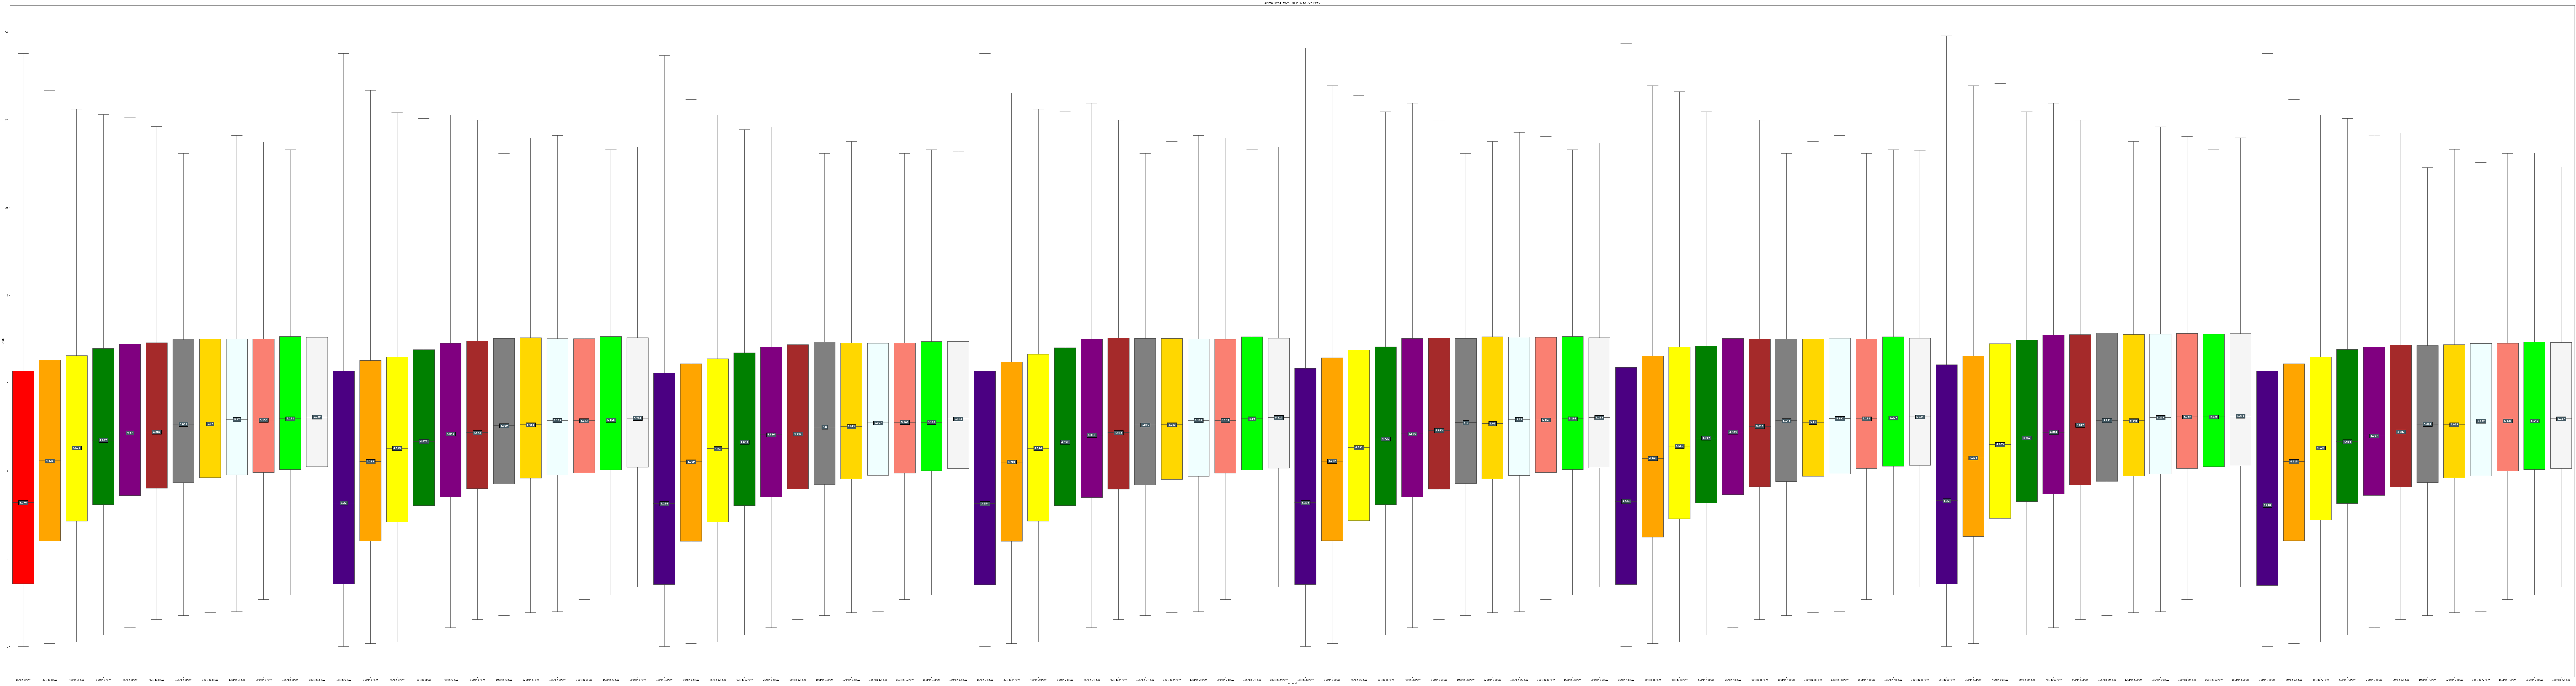

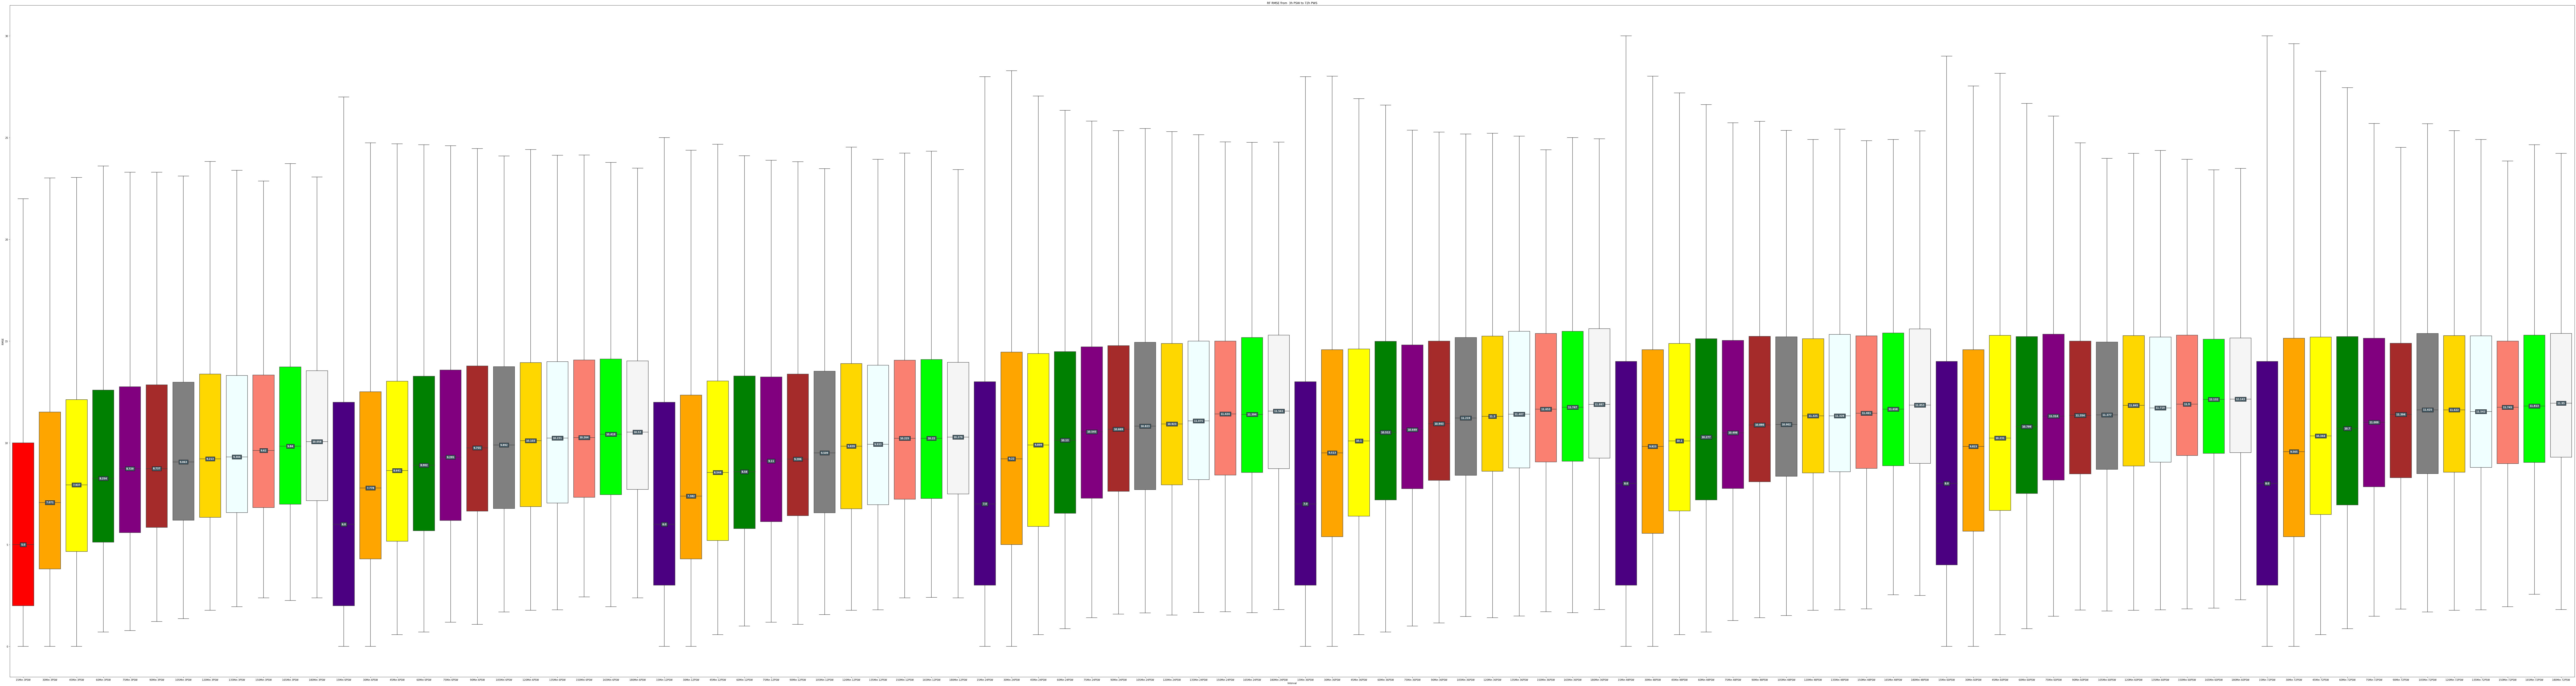

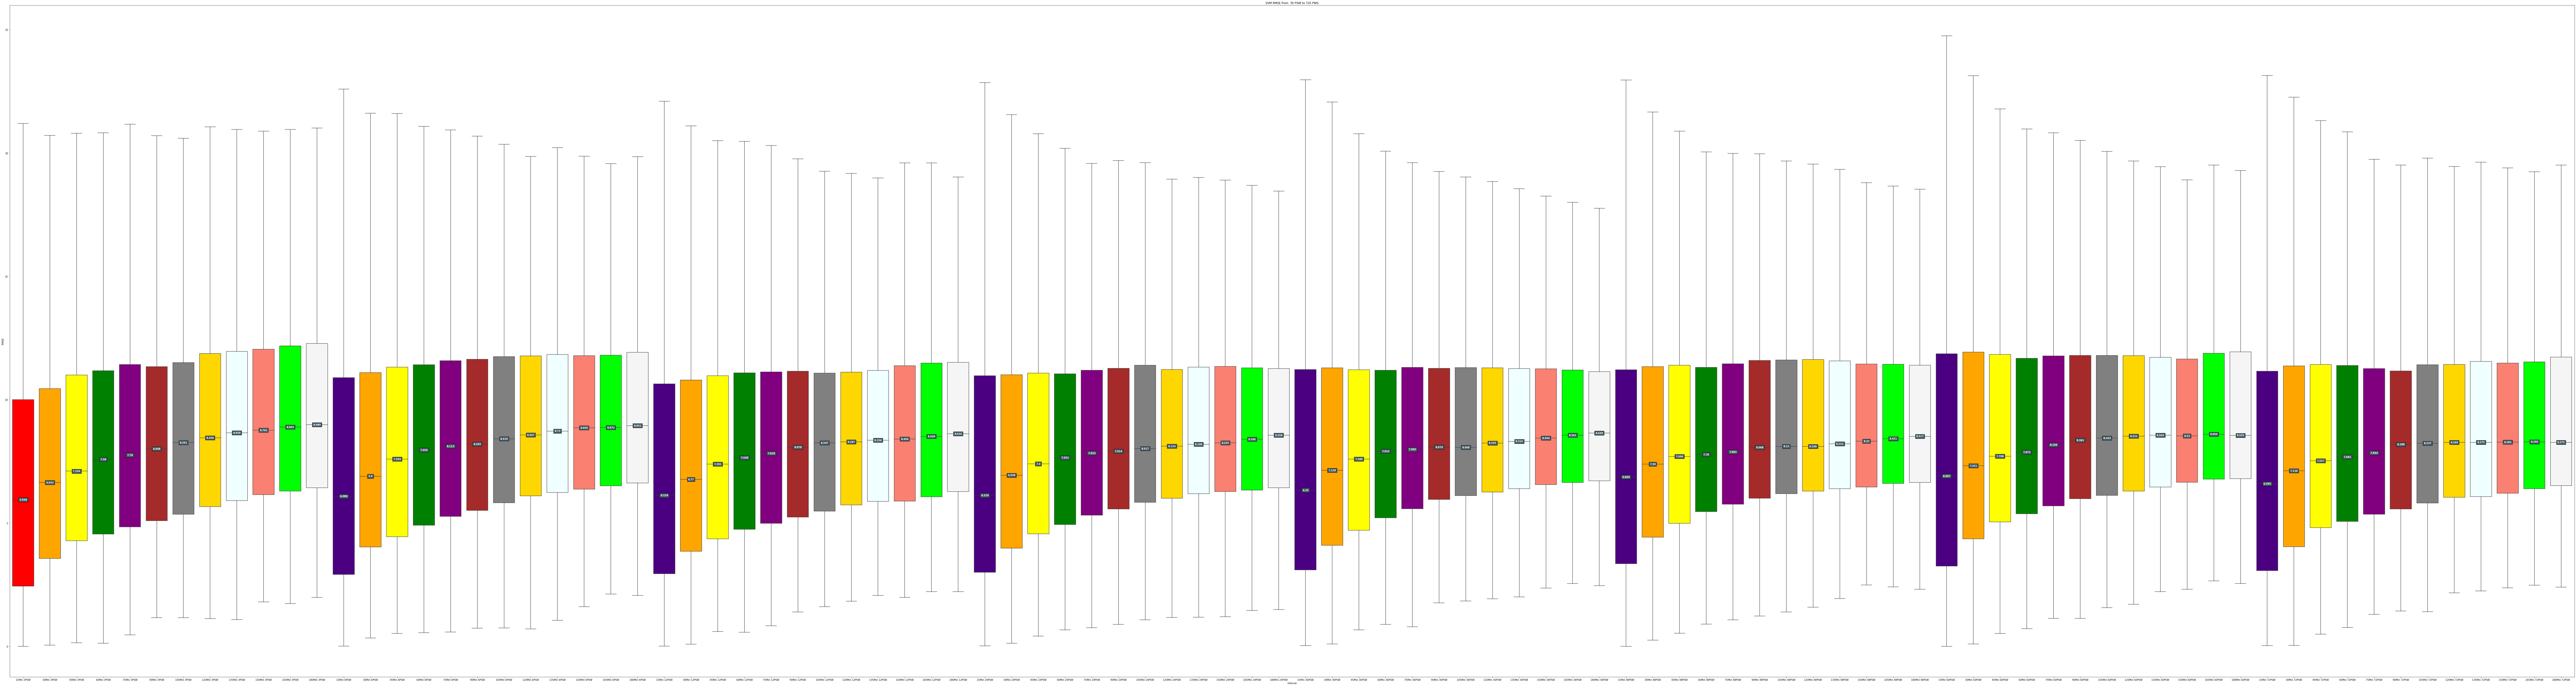

In [12]:
boxplot(Arima, "Arima", 3, 72)
boxplot(RF, "RF", 3, 72)
boxplot(SVM, "SVM",3,72)




In [13]:
joinI()